# Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [3]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("D:/assingment/Random forest assignment/Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA and Data preprocessing

In [6]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
df[df.duplicated()].shape

(0, 6)

In [9]:
df.shape

(600, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [11]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<AxesSubplot:ylabel='Count'>

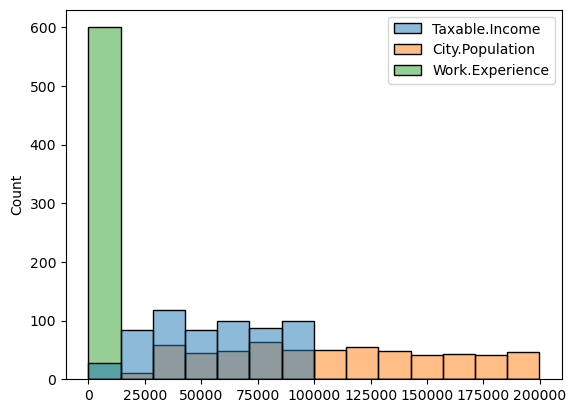

In [12]:
import seaborn as sns
sns.histplot(df)

<AxesSubplot:>

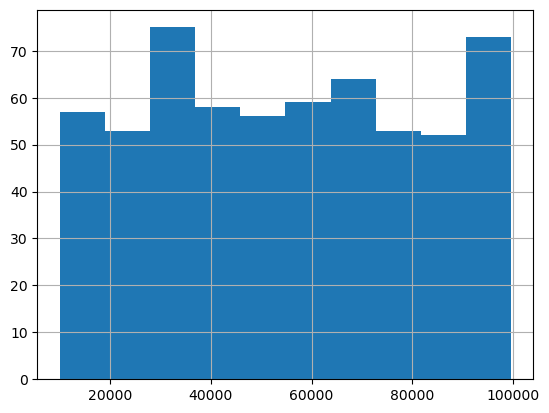

In [13]:
df['Taxable.Income'].hist()

<AxesSubplot:>

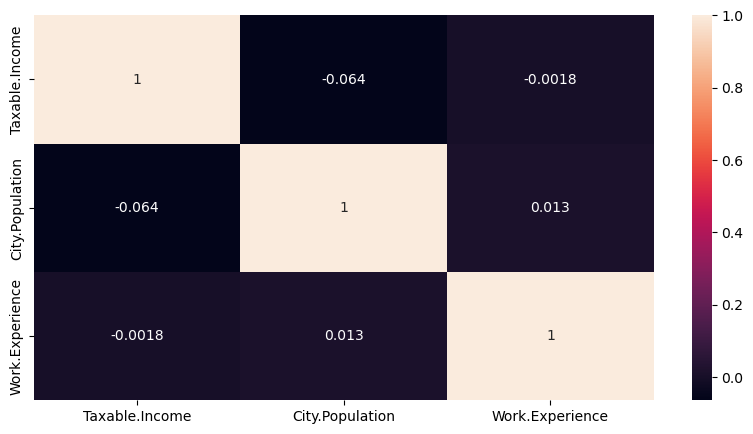

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [15]:
def distplot(param):
    plt.figure(figsize=(20,15))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.show()

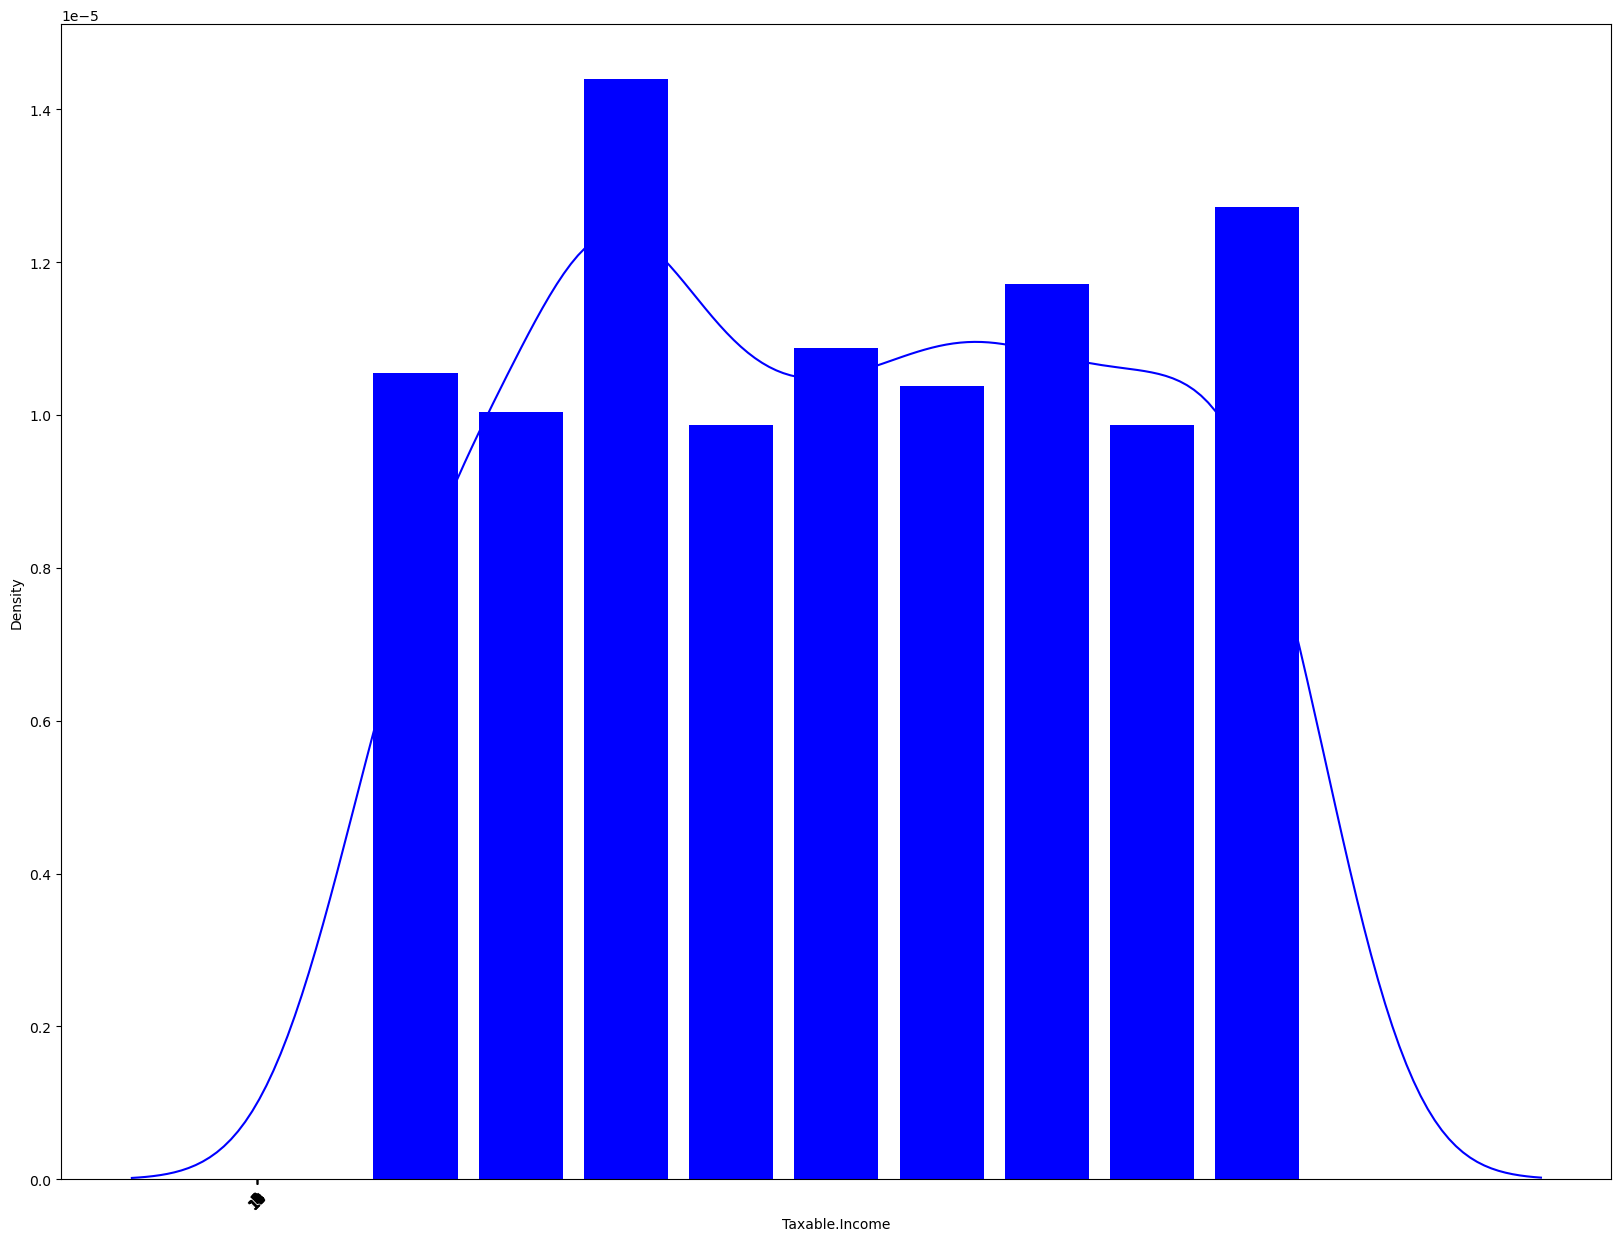

In [16]:
distplot("Taxable.Income")

In [ ]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban'])
df1 = encoder.fit_transform(df)

In [29]:
df2 = []
for value in df['Taxable.Income']:
    if value <= 30000:
        df2.append("Risky")
    else:
        df2.append("Good")
        
df1["fc_val"]= df2

In [30]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fc_val
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good


In [31]:
#train test split
x = df1.drop(['fc_val', 'Taxable.Income'],axis=1)
y = df1['fc_val']

In [34]:
y.value_counts()

Good     476
Risky    124
Name: fc_val, dtype: int64

# Randoom Forest classification

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_trees = 100
max_features = 4
kfold = KFold(n_splits=20,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results_rfc = cross_val_score(model, x, y, cv=kfold)
print(results_rfc.mean()*100)

74.16666666666669


# Bagging method

In [40]:
from sklearn.ensemble import BaggingClassifier

seed = 11
kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results_bag = cross_val_score(model1, x, y, cv=kfold)
print(results_bag.mean()*100)

73.66666666666666


# Boosting method

In [41]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 100
seed=7
kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results_boost = cross_val_score(model2, x, y, cv=kfold)
print(results_boost.mean()*100)

77.00000000000001


# Stacking method

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [43]:
# create the sub models
estimators = []
model3 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model3))
model4 = DecisionTreeClassifier()
estimators.append(('cart', model4))
model5 = SVC()
estimators.append(('svm', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results_stack = cross_val_score(ensemble, x, y, cv=kfold)
print(results_stack.mean()*100)

79.33333333333333


In [ ]:
#conclusion: stacking method gives good results when compared to others techinque